The dataset contains information on students and their marks on 3 subjects: math, reading and writing.

To pass a subject, students need a mark of at least 40 points.  
To be approved, a student needs to pass all 3 subjects.

Let's explore in more details the relationship between students marks / approval and their characteristics!

## Read data and check content

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# reading the data
df = pd.read_csv('students_performance_data.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Start your exploration by understanding the data structure

In [2]:
# Check unique values on each categorical variable

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
for i in df.columns[:-3]:
    print('There are '+str(len(pd.unique(df['%s' % i]))) +' different values in categorie %s' % i)

There are 2 different values in categorie gender
There are 5 different values in categorie race/ethnicity
There are 6 different values in categorie parental level of education
There are 2 different values in categorie lunch
There are 2 different values in categorie test preparation course


In [4]:
for i in df.columns[:-3]:
    print(i + ':' +pd.unique(df[i]))

['gender:female' 'gender:male']
['race/ethnicity:group B' 'race/ethnicity:group C'
 'race/ethnicity:group A' 'race/ethnicity:group D'
 'race/ethnicity:group E']
["parental level of education:bachelor's degree"
 'parental level of education:some college'
 "parental level of education:master's degree"
 "parental level of education:associate's degree"
 'parental level of education:high school'
 'parental level of education:some high school']
['lunch:standard' 'lunch:free/reduced']
['test preparation course:none' 'test preparation course:completed']


In [4]:
# Check the variables distribution to understand how many students have each characteristic

In [5]:
df.groupby('gender')['gender'].count()

gender
female    518
male      482
Name: gender, dtype: int64

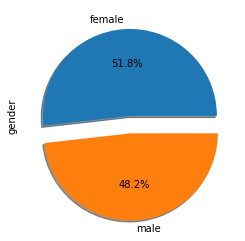

In [6]:
%matplotlib inline
df['gender'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',shadow=True)

In [7]:
df.groupby('race/ethnicity')['race/ethnicity'].count()

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64

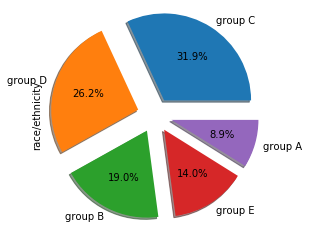

In [8]:
%matplotlib inline
df['race/ethnicity'].value_counts().plot.pie(explode=[0.2,0.2,0.2,0.2,0.2],autopct='%1.1f%%',shadow=True)

In [9]:
df.groupby('parental level of education')['parental level of education'].count()

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: parental level of education, dtype: int64

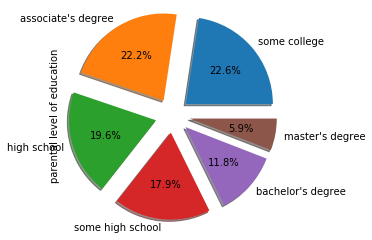

In [10]:
%matplotlib inline
df['parental level of education'].value_counts().plot.pie(explode=[0.2,0.2,0.2,0.2,0.2,0.2],autopct='%1.1f%%',shadow=True)

In [11]:
df.groupby('lunch')['lunch'].count()

lunch
free/reduced    355
standard        645
Name: lunch, dtype: int64

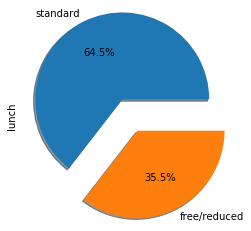

In [12]:
%matplotlib inline
df['lunch'].value_counts().plot.pie(explode=[0.2,0.2],autopct='%1.1f%%',shadow=True)

In [13]:
df.groupby('test preparation course')['test preparation course'].count()

test preparation course
completed    358
none         642
Name: test preparation course, dtype: int64

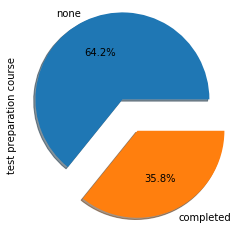

In [14]:
%matplotlib inline
df['test preparation course'].value_counts().plot.pie(explode=[0.2,0.2],autopct='%1.1f%%',shadow=True)

In [6]:
# Check and manage missing values

In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no missing value.

## Explore the overall status of the subjects' marks

In [8]:
# What's the probablility of students passing in Math? 

In [16]:
for course in df.columns[-3:]:
    print('the proba of %s is '%course + str(df[df[course] >= 40].lunch.count() / df.lunch.count()))


the proba of math score is 0.96
the proba of reading score is 0.974
the proba of writing score is 0.968


In [14]:
# What's the Probability of Students being approved (Passing in all the three subjects)?

In [17]:

print('the proba is ' + str(df['math score']\
                            [df['math score']>=40]\
                            [df['writing score']>=40]\
                            [df['reading score']>=40].count() / df.lunch.count()))

the proba is 0.949


## Go into more details on the different characteristics

In [39]:
df["approved"] = np.where((df["math score"] >= 40) & 
                            (df["writing score"] >= 40) & (df["reading score"] >= 40),1,0)
df.approved.sum()

949

In [16]:
# Does gender have an aparent impact?

In [40]:
approvedMale = df['approved'][df.gender== 'male'].sum()/df['lunch'][df.gender == 'male'].count()
print('The probability of male students being approved = ', approvedMale)

approvedFemale =  df['approved'][df.gender== 'female'].sum()/ df['lunch'][df.gender == 'female'].count()
print('The probability of female students being approved = ', approvedFemale)

The probability of male students being approved =  0.9585062240663901
The probability of female students being approved =  0.9401544401544402


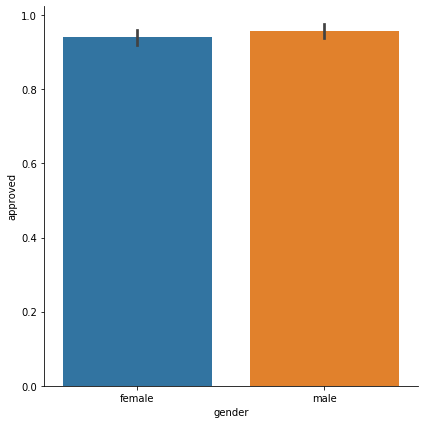

In [41]:
sns.catplot('gender','approved', kind='bar', data=df,height = 6)

In [18]:
# Does race/ethnicity have an aparent impact?

In [83]:
list1 = ['A','B','C','D','E']
for i in list1:
    approved = df['approved'][df['race/ethnicity'] == 'group %s' %i].sum() / df['lunch'][df['race/ethnicity'] == 'group %s' %i].count()
    print('The probability of group %s students being approved = ' %i,approved)

The probability of group A students being approved =  0.9325842696629213
The probability of group B students being approved =  0.9315789473684211
The probability of group C students being approved =  0.9435736677115988
The probability of group D students being approved =  0.9618320610687023
The probability of group E students being approved =  0.9714285714285714


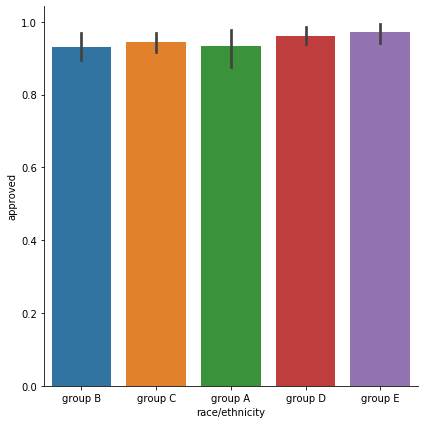

In [84]:
sns.catplot('race/ethnicity','approved', kind='bar', data=df,height = 6)

In [20]:
# Does parental level of education have an aparent impact?

In [85]:
level = pd.unique(df['parental level of education'])
for i in level:
    approved = df['approved'][df['parental level of education'] == '%s' %i].sum() / df['lunch'][df['parental level of education'] == '%s' %i].count()
    print('The probability of students have parents with %s being approved = ' %i,approved)
    
    

The probability of students have parents with bachelor's degree being approved =  0.9661016949152542
The probability of students have parents with some college being approved =  0.9557522123893806
The probability of students have parents with master's degree being approved =  1.0
The probability of students have parents with associate's degree being approved =  0.9774774774774775
The probability of students have parents with high school being approved =  0.9183673469387755
The probability of students have parents with some high school being approved =  0.9106145251396648


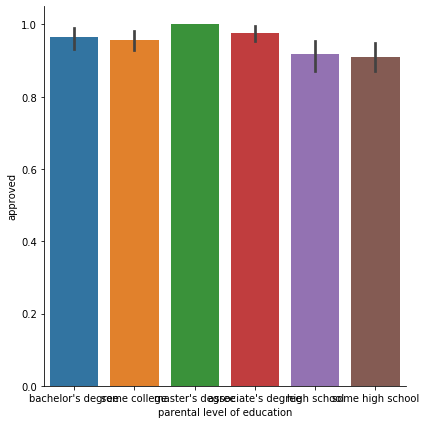

In [86]:
sns.catplot('parental level of education','approved', kind='bar', data=df,height = 6)

In [22]:
# Does lunch have an aparent impact?

In [87]:
level = pd.unique(df['lunch'])
for i in level:
    approved = df['approved'][df['lunch'] == '%s' %i].sum() / df['lunch'][df['lunch'] == '%s' %i].count()
    print('The probability of students who\' lunch is %s being approved = ' %i,approved)
    
    

The probability of students who' lunch is standard being approved =  0.9813953488372092
The probability of students who' lunch is free/reduced being approved =  0.8901408450704226


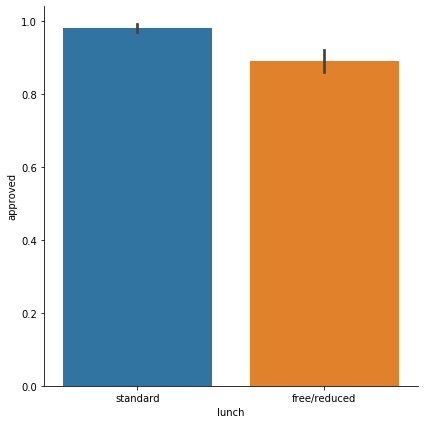

In [88]:
sns.catplot('lunch','approved', kind='bar', data=df,height = 6)

In [24]:
# Does test preparation course have an aparent impact?

In [89]:
level = pd.unique(df['test preparation course'])
for i in level:
    approved = df['approved'][df['test preparation course'] == '%s' %i].sum() / df['lunch'][df['test preparation course'] == '%s' %i].count()
    print('The probability of students who\'s test preparation course is %s being approved = ' %i,approved)
    
    

The probability of students who's test preparation course is none being approved =  0.9314641744548287
The probability of students who's test preparation course is completed being approved =  0.9804469273743017


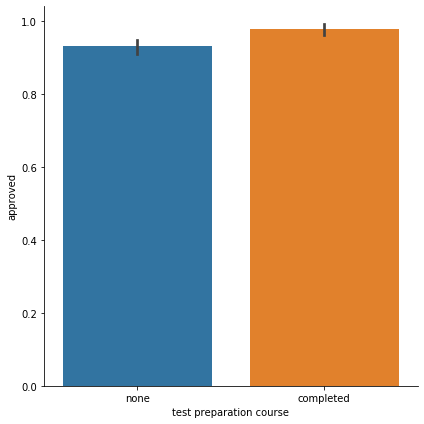

In [90]:
sns.catplot('test preparation course','approved', kind='bar', data=df,height = 6)

## Extra

In [26]:
# What about the combination of those different variables / characteristics? What other relationships between students characteristics and marks exist?

In [97]:
def output(fact):
    sns.catplot(x = fact[0], y = "approved", hue = fact[1], col = fact[2], kind = "bar",data=df, palette="Blues")
    plt.show()

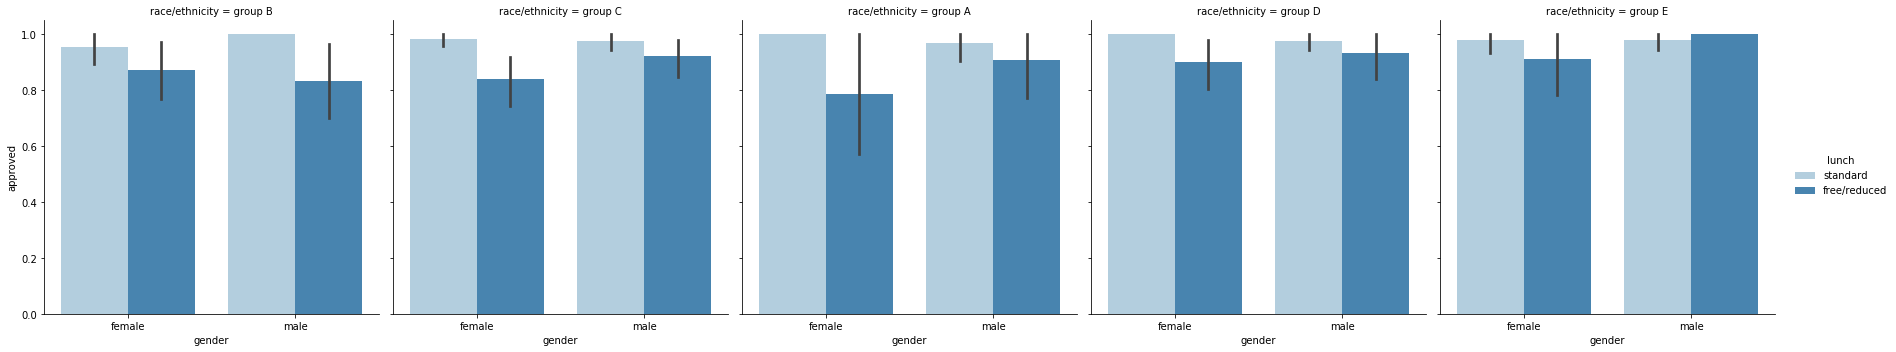

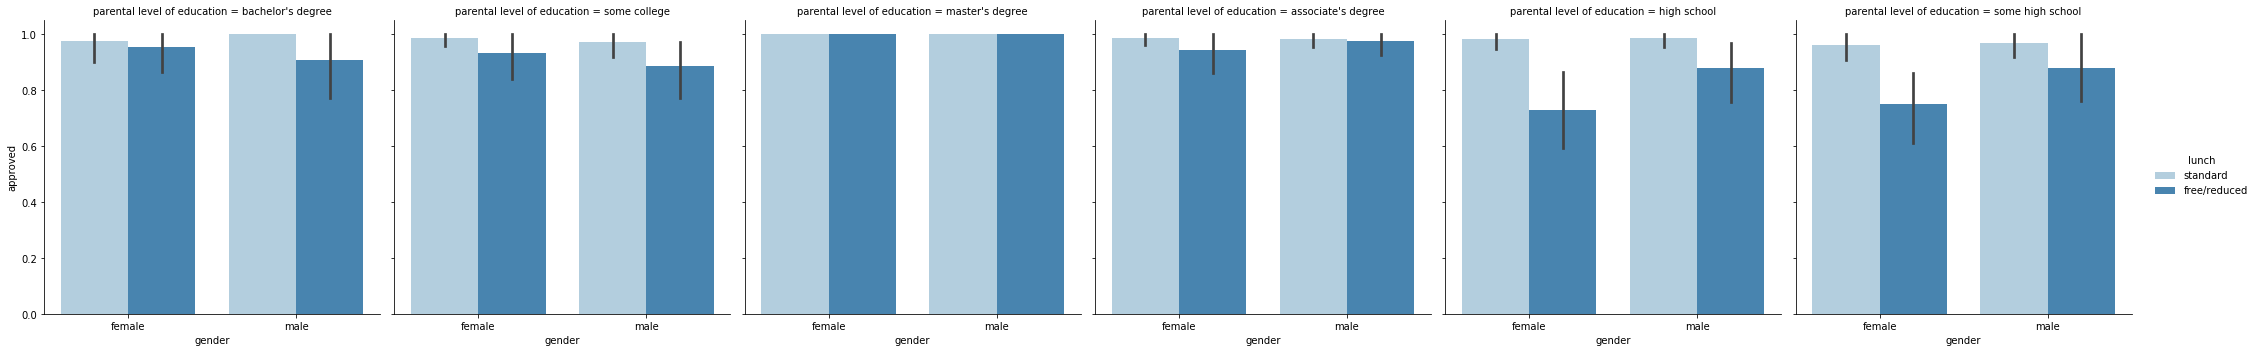

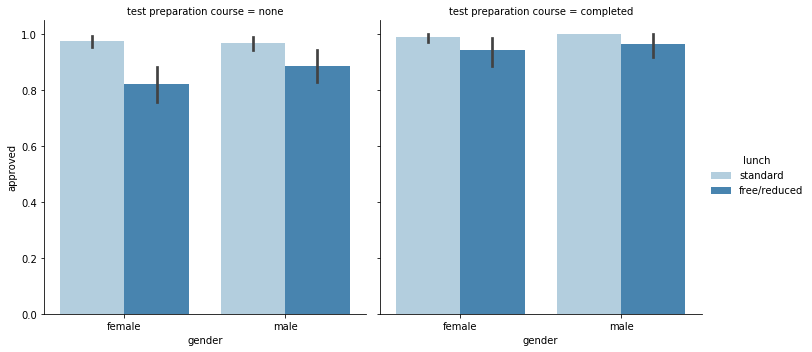

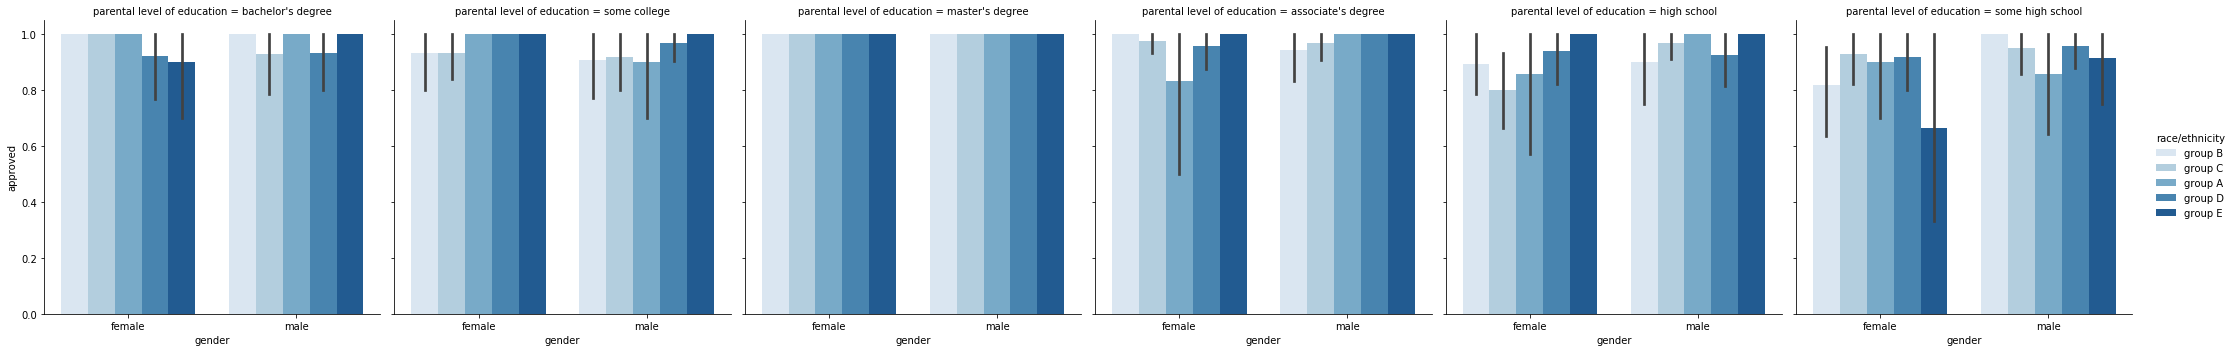

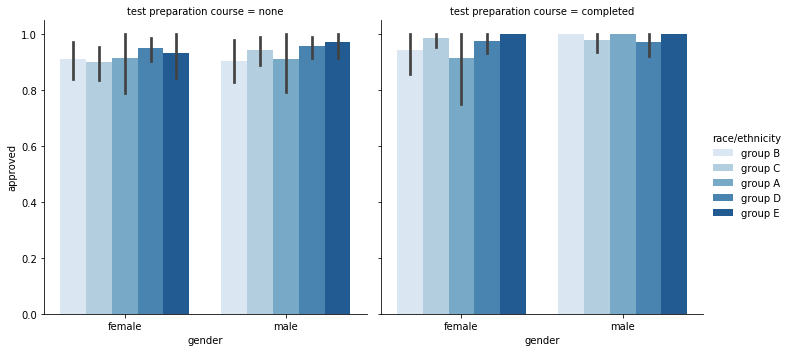

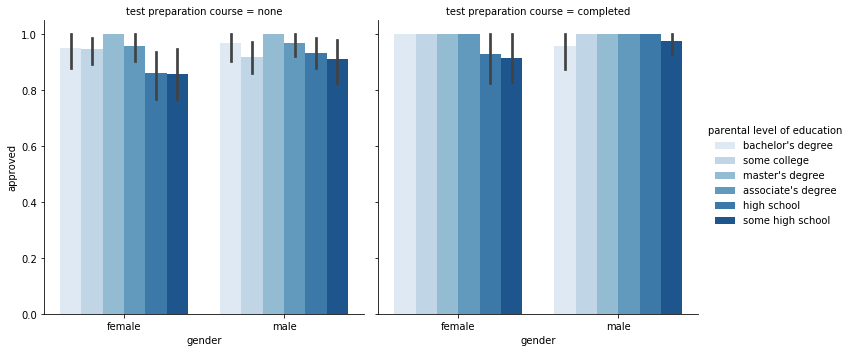

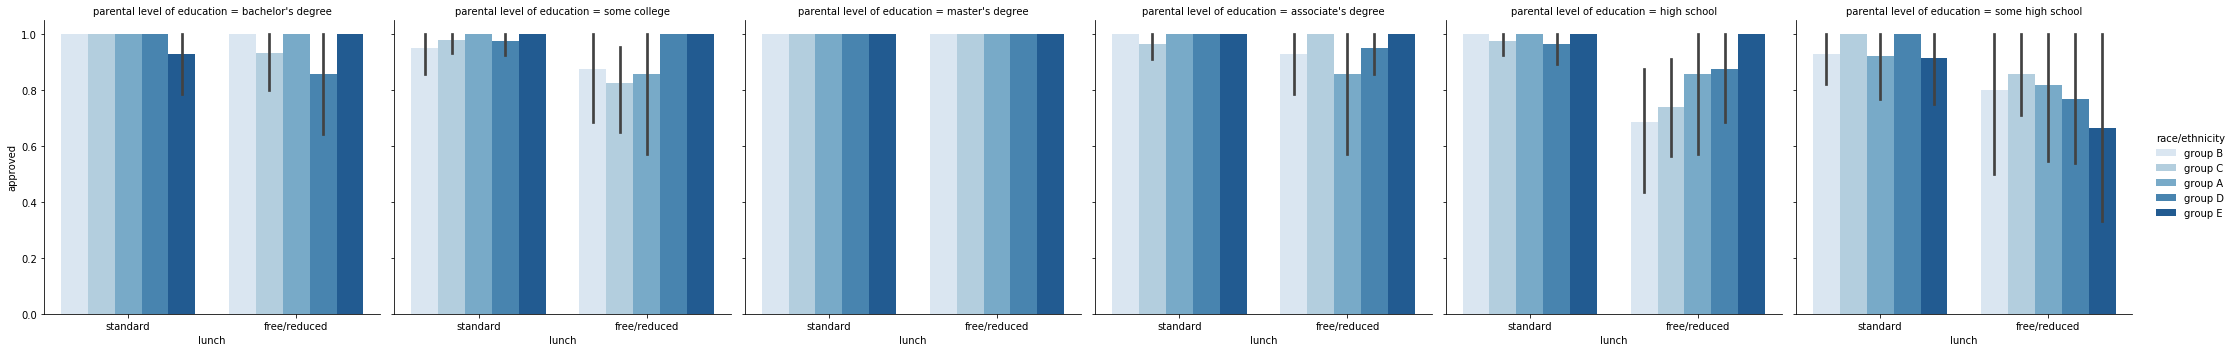

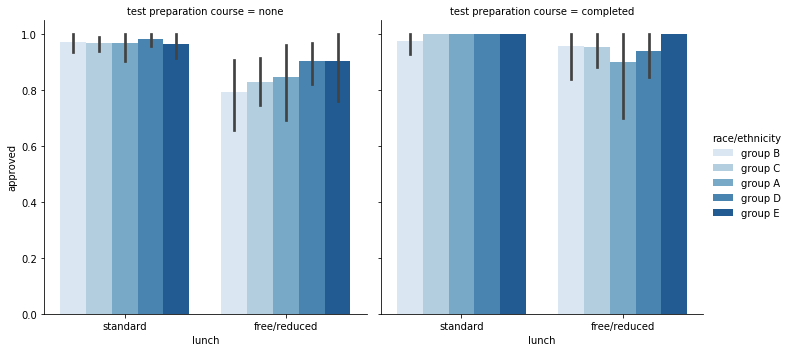

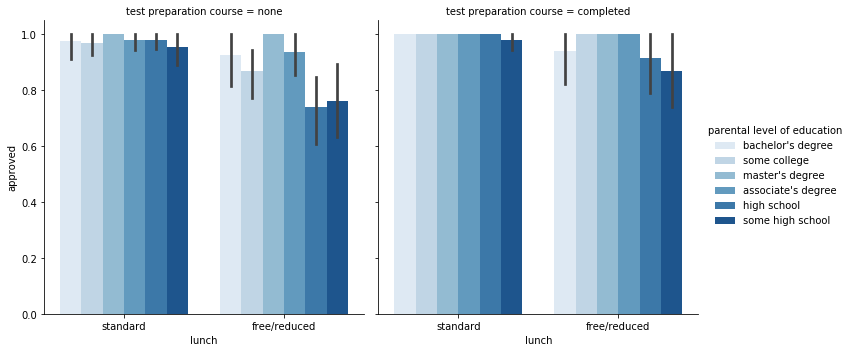

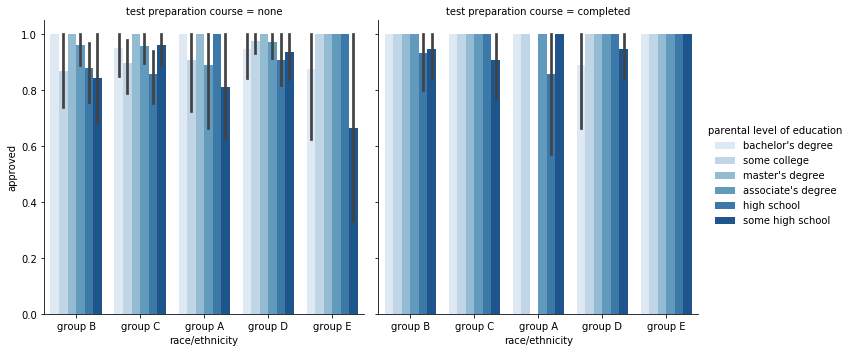

In [98]:
import itertools
fact_list = ["gender", "lunch","race/ethnicity", "parental level of education","test preparation course"]
for index,fact in enumerate(itertools.combinations(fact_list,3)):
    output(fact)